# Import Libraries

In [57]:
# Basic Libraries 
# --------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
from pylab import rcParams

# matplotlib.use("Qt5Agg")
import missingno as msno
from datetime import date

# Plotly Express - Plotly - cufflinks 
# --------------------------------------
'''
Cufflink is also a python library that connects plotly
with pandas so that we can create charts directly on data frames.
{It basically acts as a plugin.}
'''
import cufflinks as cf
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

# Metrics 
# --------------------------------------
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import LocalOutlierFactor


# Machine Learning Models 
# --------------------------------------
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Customize to Remove Warnings and Better Observation  
# ------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)
from termcolor import colored
constraints = ['#581845', '#C70039']
metric_constraints = ['#2ECC71','#34495E','#D0D3D4']
cat_feat_constraints = ['#7FB3D5','#76D7C4','#F7DC6F','#85929E','#283747']

# Load and Check Data

In [2]:
df = pd.read_csv("datasets/hitters.csv")

In [3]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(df, head=5):

    print("Info".center(60, '~'))
    print(df.info())
    print(" Dataframe - Head ".center(60, '~'))
    print(df.head(head))
    print("Unique Values".center(60, '~'))
    print(df.nunique())
    print(" Missing Values Analysis ".center(60, '~'))
    print(missing_values_analysis(df))
    print(' Duplicate Values Analysis '.center(60, '~'))
    print(df.duplicated().sum())
    print(" QUANTILES ".center(60, '~'))
    print(df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~Info~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    fl

In [4]:
def grab_col_names(df, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].dtypes !=
                   "O" and df[col].nunique() < cat_th]
    cat_but_car = [col for col in df.columns if df[col].dtypes ==
                   "O" and df[col].nunique() > car_th]

    cat_cols += num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float", "int32", "float32", "int64",
                                                                "float64"]]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")

    print("".center(60, '~'))
    print(f'cat_cols: {cat_cols}')
    print(f'cat_cols len: {len(cat_cols)}')
    print("".center(60, '~'))

    print(f'num_cols: {num_cols}')
    print(f'num_cols len: {len(num_cols)}')
    print("".center(60, '~'))

    print(f'cat_but_car: {cat_but_car}')
    print(f'cat_but_car len: {len(cat_but_car)}')
    print("".center(60, '~'))

    print(f'num_but_cat: {num_but_cat}')
    print(f'num_but_cat len: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 322
Variables: 20
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_cols: ['League', 'Division', 'NewLeague']
cat_cols len: 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_cols: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary']
num_cols len: 17
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_but_car: []
cat_but_car len: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_but_cat: []
num_but_cat len: 0


In [5]:
def check_classes(df):  
    dict = {}
    for i in list(df.columns):
        dict[i] = df[i].value_counts().shape[0]

    unq = pd.DataFrame(dict,index=["Unique Count"]).transpose().sort_values(by="Unique Count", ascending=False)
    return unq

check_classes(df)

,Unique Count
CAtBat,314
CHits,288
CRBI,262
CRuns,261
CWalks,248
AtBat,247
PutOuts,232
Assists,161
Salary,150
CHmRun,146


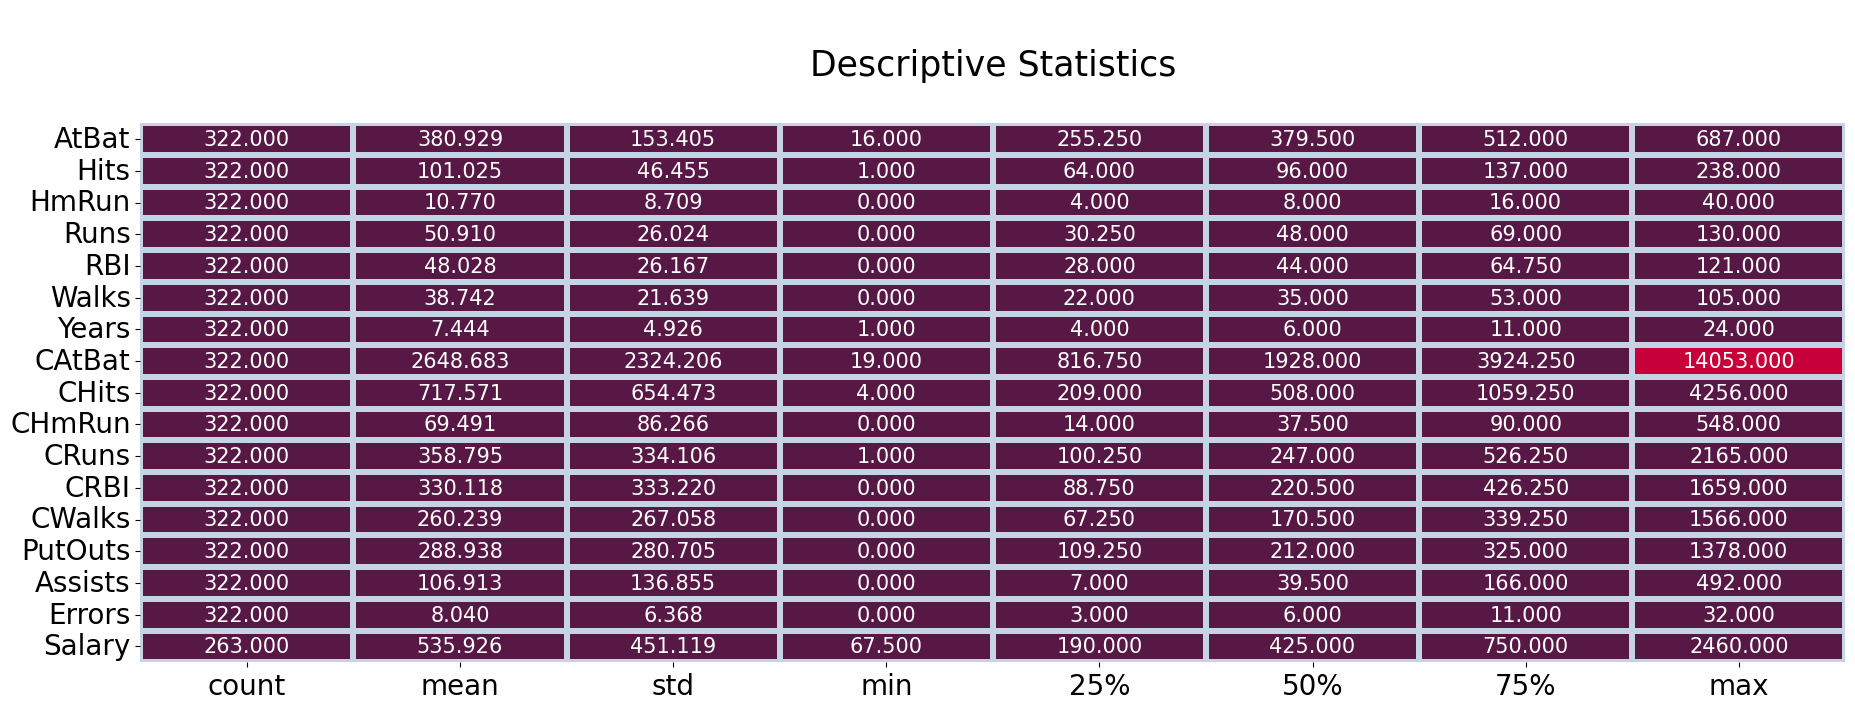

In [6]:
def descriptive_statistics(df):
    describe_ = df.describe().T
    describe_df = pd.DataFrame(index=df.columns,
                               columns=describe_.columns,
                               data=describe_)

    f, ax = plt.subplots(figsize=(22,7))
    sns.heatmap(describe_df,
                annot=True,
                cmap= constraints,
                fmt='.3f',
                ax=ax,
                linecolor='#C6D3E5',
                linewidths=3,
                cbar=False,
                annot_kws={"size": 15})
    plt.xticks(size=20)
    plt.yticks(size=20,
               rotation=0)
    plt.title("\nDescriptive Statistics\n", size=25)
    plt.show()


num_desc = df[num_cols]
descriptive_statistics(num_desc)

# Exploratory Data Analysis

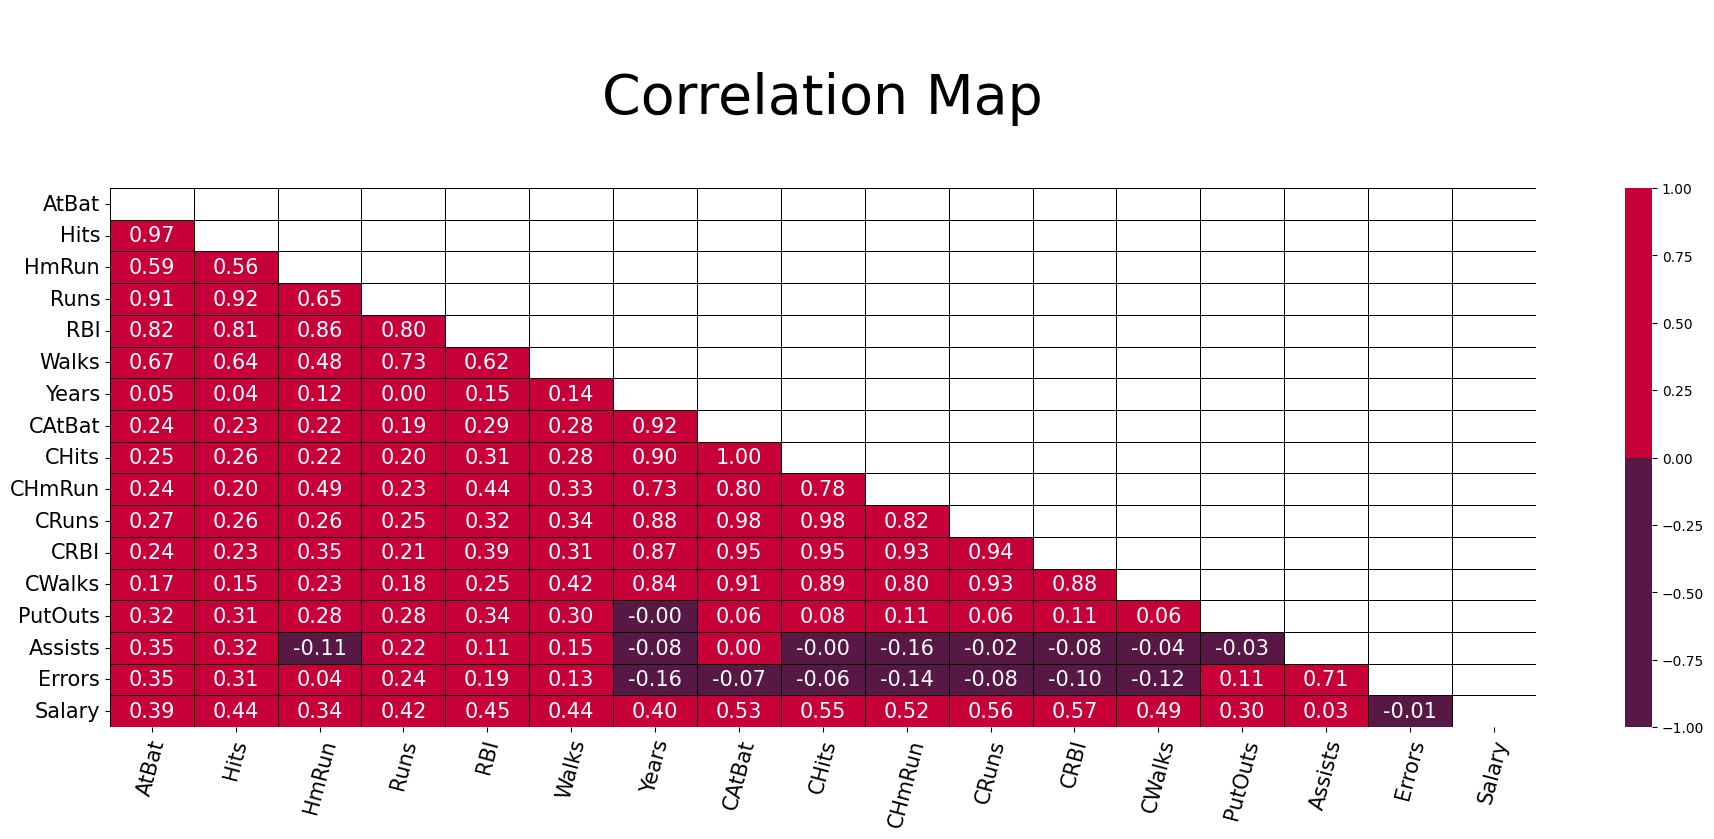

In [7]:
def corr_map(df,width=23, height=7):
    mtx = np.triu(df[num_cols].corr())
    f,ax=plt.subplots(figsize = (width,height))
    sns.heatmap(df[num_cols].corr(),
                annot= True,
                fmt = ".2f",
                ax=ax,
                vmin = -1,
                vmax = 1,
                cmap = constraints,
                mask = mtx,
                linewidth = 0.4,
                linecolor = "black",
                annot_kws={"size": 15})
    plt.yticks(rotation=0,size=15)
    plt.xticks(rotation=75,size=15)
    plt.title('\nCorrelation Map\n', size = 40)
    plt.show()
    
corr_map(df)

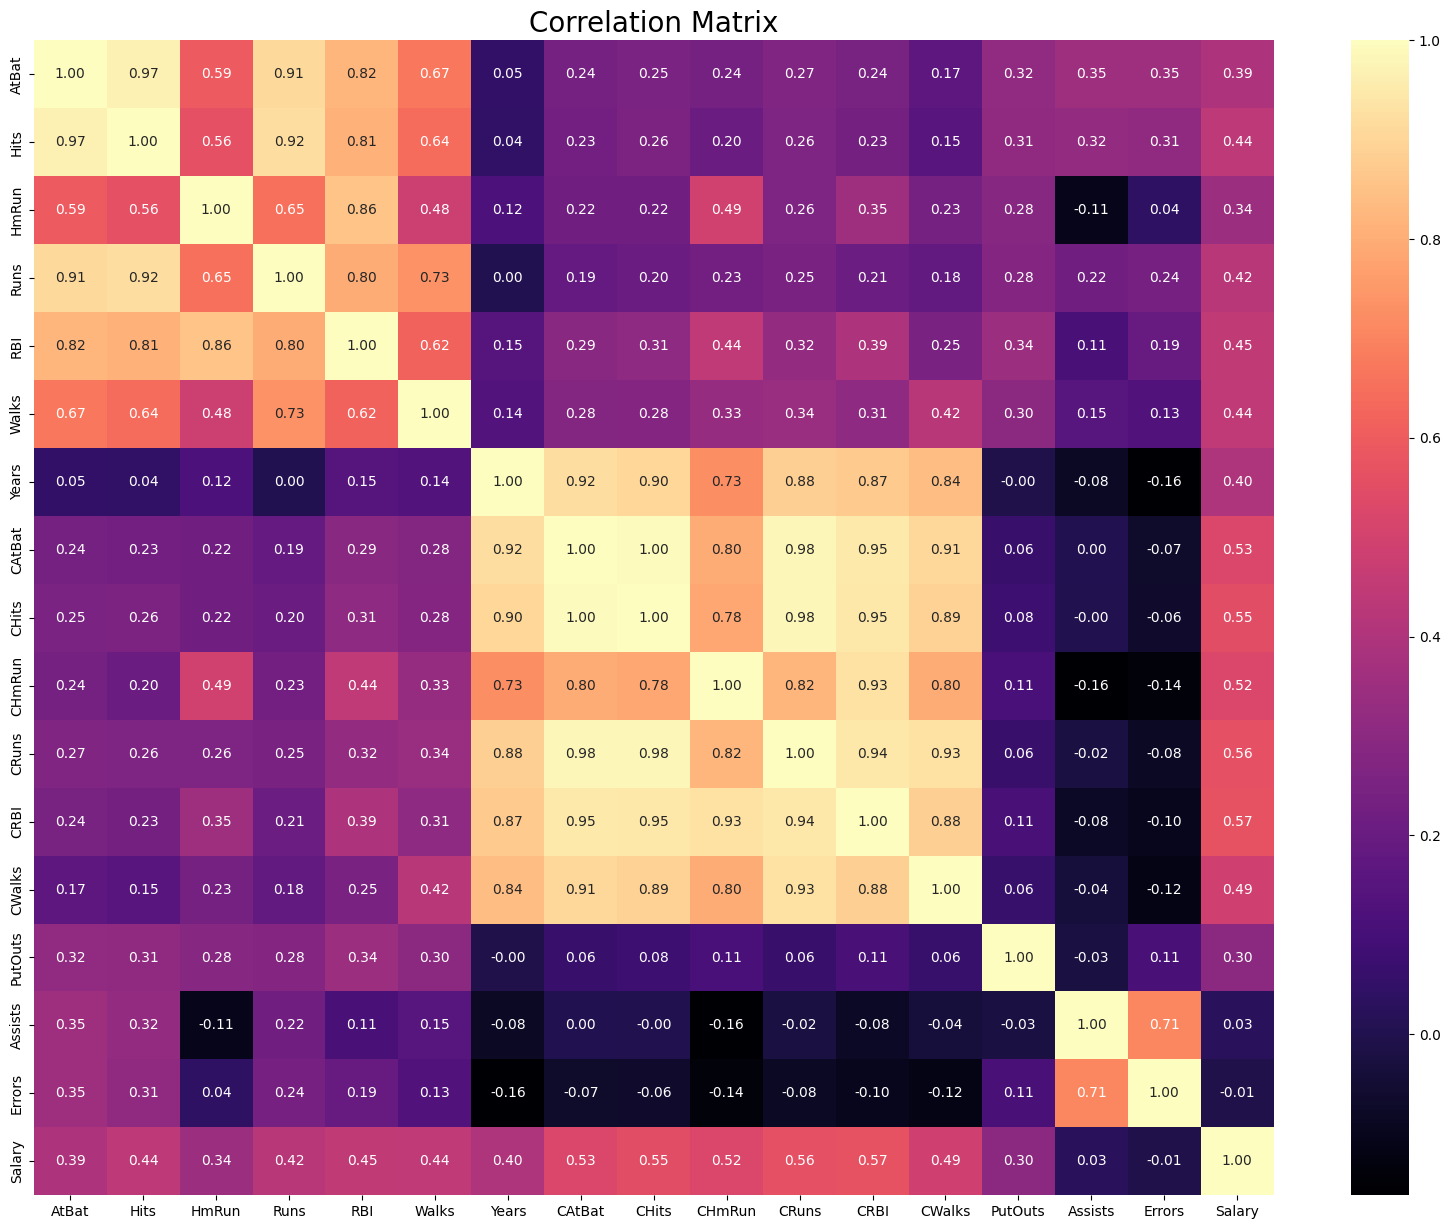

In [8]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Analysis of Numerical Features

In [9]:
def num_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Quantiles', 'Distribution'))

    fig.add_trace(go.Box(y=df[column_name],
                         name=str(column_name),
                         showlegend=False,
                         marker_color=constraints[1]),
                  row=1, col=1)

    fig.add_trace(go.Histogram(x=df[column_name],
                               xbins=dict(start=df[column_name].min(),
                                          end=df[column_name].max()),
                               showlegend=False,
                               name=str(column_name),
                               marker=dict(color=constraints[0],
                                           line=dict(color='#DBE6EC',
                                                     width=1))),
                  row=1, col=2)

    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


i = 0
for column_name in num_cols:
    i = i + 1
    num_summary(df, column_name)

In [10]:
# # Numerik değişken analizi
# def num_summary(df, numerical_col, plot=False):
#     quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
#     print(df[numerical_col].describe(quantiles).T)

#     if plot:
#         plt.figure(figsize=(10, 5))
#         df[numerical_col].hist(bins=20)
#         plt.xlabel(numerical_col)
#         plt.title(numerical_col)
#         plt.show()

# for col in num_cols:
#     num_summary(df, col, plot=True)

# Analysis of Categorical Features

In [11]:
def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=df[column_name].value_counts().values.tolist(),
                         x=[str(i) for i in df[column_name].value_counts().index],
                         text=df[column_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=column_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=cat_feat_constraints,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=df[column_name].value_counts().keys(),
                         values=df[column_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=column_name,
                         marker=dict(colors=cat_feat_constraints)),
                  row=1, col=2)

    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)

for col in cat_cols:
    categorical_variable_summary(df, col)

In [12]:
# def cat_summary(df, col_name, plot=False):
#     print(pd.DataFrame({col_name: df[col_name].value_counts(),
#                         "Ratio": 100 * df[col_name].value_counts() / len(df)}))
#     print("##########################################")
#     if plot:
#         plt.figure(figsize=(10, 5))
#         sns.countplot(x=df[col_name], data=df)
#         plt.show()


# for col in cat_cols:
#     cat_summary(df, col, plot=True)


In [13]:
# Kategorik değişkenlerin target değişkene göre analizi
def target_summary_with_cat(df, target, categorical_col):
    print(pd.DataFrame({"Target_Mean": df.groupby(categorical_col)[target].mean(),
                        "Count": df[categorical_col].value_counts(),
                        "Ratio": 100 * df[categorical_col].value_counts() / len(df)}))
    print("#" * 50)

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        Target_Mean  Count    Ratio
League                             
A         541.99955    175 54.34783
N         529.11750    147 45.65217
##################################################
          Target_Mean  Count    Ratio
Division                             
E           624.27136    157 48.75776
W           450.87687    165 51.24224
##################################################
           Target_Mean  Count    Ratio
NewLeague                             
A            537.11303    176 54.65839
N            534.55385    146 45.34161
##################################################


In [14]:
# Numerik değişkenlerin target değişkenine göre analizi

# def target_summary_with_num(df, target, numerical_col):
#     print(df.groupby(target).agg({numerical_col: "mean"}))
#     print("#" * 50)

# for col in num_cols:
#     result_df = target_summary_with_num(df, "Salary", col)


def target_summary_with_num(df, target, numerical_col):
    return df.groupby(target).agg({numerical_col: "mean"})


combined_df = pd.DataFrame()

for col in num_cols:
    result_df = target_summary_with_num(df, "Salary", col)
    combined_df = pd.concat([combined_df, result_df], axis=1)

combined_df


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
Salary,,,,,,,,,,,,,,,,,
67.50000,181.00000,41.00000,1.00000,15.00000,21.00000,33.00000,2.00000,232.00000,50.00000,4.00000,20.00000,29.00000,45.00000,326.00000,29.00000,5.00000,67.50000
68.00000,209.00000,54.00000,3.00000,25.00000,14.00000,12.00000,1.00000,209.00000,54.00000,3.00000,25.00000,14.00000,12.00000,102.00000,6.00000,3.00000,68.00000
70.00000,248.60000,57.40000,3.20000,27.80000,22.40000,22.20000,1.40000,256.80000,59.60000,3.20000,29.60000,23.20000,23.60000,86.40000,82.20000,12.60000,70.00000
75.00000,236.40000,58.20000,3.00000,25.20000,22.80000,21.60000,2.00000,309.20000,73.60000,3.60000,33.00000,27.00000,25.60000,210.20000,110.60000,8.60000,75.00000
80.00000,399.00000,102.00000,3.00000,56.00000,34.00000,34.00000,5.00000,670.00000,167.00000,4.00000,89.00000,48.00000,54.00000,211.00000,9.00000,3.00000,80.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940.00000,514.00000,144.00000,0.00000,67.00000,54.00000,79.00000,9.00000,4739.00000,1169.00000,13.00000,583.00000,374.00000,528.00000,229.00000,453.00000,15.00000,1940.00000
1975.00000,677.00000,238.00000,31.00000,117.00000,113.00000,53.00000,5.00000,2223.00000,737.00000,93.00000,349.00000,401.00000,171.00000,1377.00000,100.00000,6.00000,1975.00000
2127.33300,20.00000,1.00000,0.00000,0.00000,0.00000,0.00000,2.00000,41.00000,9.00000,2.00000,6.00000,7.00000,4.00000,78.00000,220.00000,6.00000,2127.33300


In [15]:
# DATA PREPROCESSING
# Outliers (Aykırı Değerler)
# Missing Values (Eksik Değerler)
# Feature Extraction (Özellik Çıkarımı)
# Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)
# Feature Scaling (Özellik Ölçeklendirme)

# Data Preprocessing

## Feature Extraction

In [16]:
# Kariyerleri ile ilgili olan değişkenler kariyer yıllarına bölünerek ortalama değerler elde edilerek veri setinde yeni değişkenler oluşturulmuştur.
df["OrtCAtBat"] = df["CAtBat"] / df["Years"]
df["OrtCHits"] = df["CHits"] / df["Years"]
df["OrtCHmRun"] = df["CHmRun"] / df["Years"]
df["OrtCruns"] = df["CRuns"] / df["Years"]
df["OrtCRBI"] = df["CRBI"] / df["Years"]
df["OrtCWalks"] = cwalks = df["CWalks"] / df["Years"]

df["Run_Rate"]= df["HmRun"] / df["Runs"] + 0.00001
df["AtBat_Hits_Rate"] = df["AtBat"] / df["Hits"] + 0.00001
df["RBI_Rates"] = df["RBI"] / df["CRBI"] + 0.00001
df["Yearly_Walks_Rate"] = df["Walks"] / df["Years"] + 0.00001
df["Yearly_RBI"] = df["RBI"] / df["Years"] + 0.00001
df["PutOuts_Rate"] = df["PutOuts"] / df["Years"] + 0.00001
df["Hit_Rate"] = df["CAtBat"] / df["CHits"] + 0.00001
df["Error_Mean"] = df["Errors"] / df["CWalks"] * 100


df['BattingAverage'] = df['Hits'] / df['AtBat']
df['SluggingPercentage'] = (df['Hits'] + df['HmRun'] * 4) / df['AtBat']
df['OBP'] = (df['Hits'] + df['Walks']) / (df['AtBat'] + df['Walks'])
df['FieldingPercentage'] = (df['Assists'] + df['PutOuts']) / (df['Assists'] + df['PutOuts'] + df['Errors'])
df['Experience'] = df['Years'] * df['CAtBat']
df['RunsPerHit'] = df['CRuns'] / df['CHits']
df['RBIPerHit'] = df['CRBI'] / df['CHits']

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 41
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_cols: ['League', 'Division', 'NewLeague']
cat_cols len: 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_cols: ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Salary', 'OrtCAtBat', 'OrtCHits', 'OrtCHmRun', 'OrtCruns', 'OrtCRBI', 'OrtCWalks', 'Run_Rate', 'AtBat_Hits_Rate', 'RBI_Rates', 'Yearly_Walks_Rate', 'Yearly_RBI', 'PutOuts_Rate', 'Hit_Rate', 'Error_Mean', 'BattingAverage', 'SluggingPercentage', 'OBP', 'FieldingPercentage', 'Experience', 'RunsPerHit', 'RBIPerHit']
num_cols len: 38
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cat_but_car: []
cat_but_car len: 0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
num_but_cat: []
num_but_cat len: 0


## Encoding (Label Encoding, One-Hot Encoding, Rare Encoding)

In [18]:
binary_col = [col for col in df.columns if
              df[col].dtypes in ['object', 'category'] and df[col].nunique() == 2]


def label_encoder(df, binary_col):
    le = LabelEncoder()
    df[binary_col] = le.fit_transform(df[binary_col])
    return df


for col in binary_col:
    label_encoder(df, col)


ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


def one_hot_encoder(df, categorical_cols, drop_first=True):
    df = pd.get_dummies(df, columns=categorical_cols,
                        drop_first=drop_first, dtype=int)
    return df


df = one_hot_encoder(df, ohe_cols)


## Missing Values

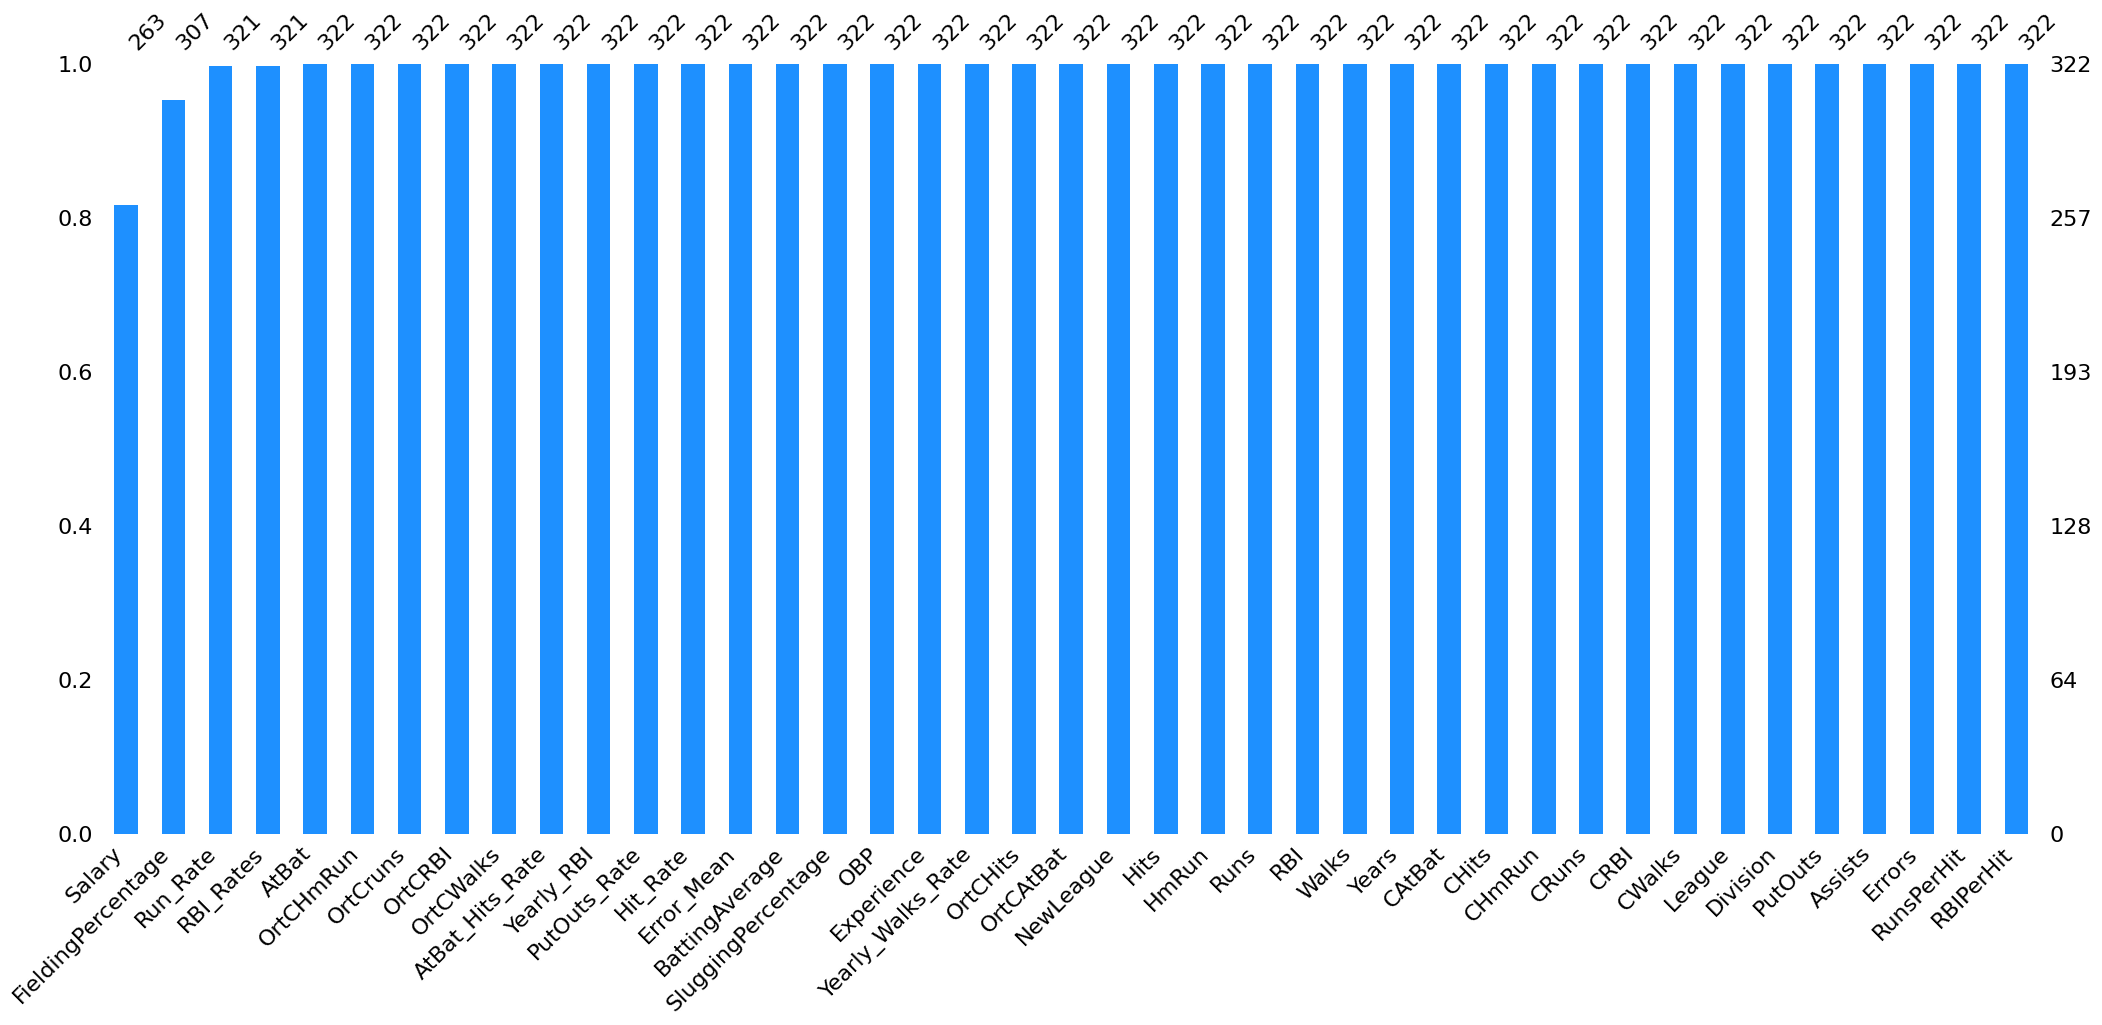

In [19]:
msno.bar(df ,color="dodgerblue", sort="ascending");

In [20]:
def missing_values_table(df, na_name=False):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]

    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0]
             * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)],
                           axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)

    if na_name:
        return na_columns


missing_values_table(df)


                    n_miss    ratio
Salary                  59 18.32000
FieldingPercentage      15  4.66000
Run_Rate                 1  0.31000
RBI_Rates                1  0.31000


In [21]:
if np.any(np.isinf(df)):
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

print("Infinity values:", np.any(np.isinf(df)))

Infinity values: False


In [22]:
# Eksik gözlemler KNN Algoritması ile dolduruldu.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns = df.columns)

## Outliers

In [23]:
def outlier_thresholds(df, col_name, q1=0.1, q3=0.9):
    # q1=0.25, q3=0.75
    q1 = df[col_name].quantile(q1)
    q3 = df[col_name].quantile(q3)
    iqr = q3 - q1
    up = q3 + 1.5 * iqr
    low = q1 - 1.5 * iqr
    return low, up


def check_outlier(df, col_name):
    low, up = outlier_thresholds(df, col_name)
    if df[(df[col_name] > up) | (df[col_name] < low)].any(axis=None):
        return True
    return False


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)


In [24]:
# Local Outlier Factor Yöntemi ile Aykırı Gözlem Analizi (LOF)

lof =LocalOutlierFactor(n_neighbors= 20)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [25]:
# Skor değerleri gelmiştir.
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-4.24343777, -2.95283217, -2.94672418, -2.22021303, -2.20724128,
       -2.02471311, -1.86293877, -1.58364083, -1.55828594, -1.54501658,
       -1.48894572, -1.46543953, -1.44476285, -1.44469942, -1.40652097,
       -1.38931438, -1.38470704, -1.37331109, -1.36254322, -1.31456587,
       -1.30828026, -1.25712581, -1.20774106, -1.20323482, -1.19657659,
       -1.18315029, -1.16949536, -1.16553153, -1.15406749, -1.15388068])

In [26]:
# Eşik değeri belirlenilmiştir.
threshold = np.sort(df_scores)[9]
threshold

-1.5450165803334754

In [27]:
# Belirlenen eşik değer veri setine uyarlanarak aykırı gözlemlerden kurtulunmuş olundu.
outlier = df_scores > threshold
df = df[outlier]

print(df.shape)

(312, 41)


In [28]:
def rare_analyser(df, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(df[col].value_counts()))
        print(pd.DataFrame({
            "COUNT": df[col].value_counts(),
            "RATIO": df[col].value_counts() / len(df),
            "TARGET_MEAN": df.groupby(col)[target].mean()
        }), end="\n\n")


rare_analyser(df, "Salary", cat_cols)


League : 2
         COUNT   RATIO  TARGET_MEAN
League                             
0.00000    173 0.55449    542.61777
1.00000    139 0.44551    489.98348

Division : 2
          COUNT   RATIO  TARGET_MEAN
Division                            
0.00000     156 0.50000    581.64093
1.00000     156 0.50000    456.69611

NewLeague : 2
           COUNT   RATIO  TARGET_MEAN
NewLeague                            
0.00000      173 0.55449    537.77211
1.00000      139 0.44551    496.01441



In [29]:
def rare_encoder(df, rare_perc):
    temp_df = df.copy()
    rare_columns = [col for col in temp_df.columns if temp_df[col].dtype == "O" and
                    (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]
    # bu şarta uyan kolon var mı
    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])
    return temp_df


new_df = rare_encoder(df, 0.01)
rare_analyser(new_df, "Salary", cat_cols)

League : 2
         COUNT   RATIO  TARGET_MEAN
League                             
0.00000    173 0.55449    542.61777
1.00000    139 0.44551    489.98348

Division : 2
          COUNT   RATIO  TARGET_MEAN
Division                            
0.00000     156 0.50000    581.64093
1.00000     156 0.50000    456.69611

NewLeague : 2
           COUNT   RATIO  TARGET_MEAN
NewLeague                            
0.00000      173 0.55449    537.77211
1.00000      139 0.44551    496.01441



## Feature Scaling

In [30]:
num_cols = [col for col in num_cols if col not in ["Salary"]]

rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

# Modelling With Linear Regression Models

In [56]:
# Doğrusal Regresyon
# Ridge Regresyon
# Lasso Regresyon
# ElasticNet Regresyon

In [31]:
X = df.drop(["Salary"], axis=1)
y = df[["Salary"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=46)


In [32]:
lin_reg = LinearRegression().fit(X_train, y_train)

y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

lin_reg_test_MSE = mean_squared_error(y_pred_test, y_test)
lin_reg_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
lin_reg_test_MAE = mean_absolute_error(y_pred_test, y_test)
lin_reg_test_R2 = r2_score(y_pred_test, y_test)

lin_reg_train_MSE = mean_squared_error(y_pred_train, y_train)
lin_reg_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
lin_reg_train_MAE = mean_absolute_error(y_pred_train, y_train)
lin_reg_train_R2 = r2_score(y_pred_train, y_train)

lin_reg_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [33]:
ridge = Ridge().fit(X_train, y_train)

y_pred_test = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)

ridge_test_MSE = mean_squared_error(y_pred_test, y_test)
ridge_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
ridge_test_MAE = mean_absolute_error(y_pred_test, y_test)
ridge_test_R2 = r2_score(y_pred_test, y_test)

ridge_train_MSE = mean_squared_error(y_pred_train, y_train)
ridge_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
ridge_train_MAE = mean_absolute_error(y_pred_train, y_train)
ridge_train_R2 = r2_score(y_pred_train, y_train)

ridge_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [34]:
# Bazı alpha setleri hazırlanılmıştır. Model için denenip en uygunu seçilecektir.
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1]
alphas5 = np.arange(100,10000,10) 


In [35]:
# Belli alpha setleri denenerek final modeli için en uygun alpha değeri belirlenecektir. Cross Validation için RidgeCV fonk. Kullanılmaktadır.

# Assuming alphas3 is the original array that may contain zero or negative values
# Filter out the positive alpha values
positive_alphas = [alpha for alpha in alphas3 if alpha > 0]

ridge_cv = RidgeCV(alphas=positive_alphas,
                   scoring="neg_mean_squared_error", cv=10).fit(X_train, y_train)


In [36]:
ridge_alpha = ridge_cv.alpha_

# Belirlenen alpha değerine göre final modeli kururlmuştur.
ridge_tuned = Ridge(alpha=ridge_alpha).fit(X_train, y_train)

y_pred_test = ridge_tuned.predict(X_test)
y_pred_train = ridge_tuned.predict(X_train)

ridge_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
ridge_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
ridge_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
ridge_tuned_test_R2 = r2_score(y_pred_test, y_test)

ridge_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
ridge_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
ridge_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
ridge_tuned_train_R2 = r2_score(y_pred_train, y_train)

ridge_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [37]:
lasso = Lasso().fit(X_train, y_train)

y_pred_test = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)

lasso_test_MSE = mean_squared_error(y_pred_test, y_test)
lasso_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
lasso_test_MAE = mean_absolute_error(y_pred_test, y_test)
lasso_test_R2 = r2_score(y_pred_test, y_test)

lasso_train_MSE = mean_squared_error(y_pred_train, y_train)
lasso_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
lasso_train_MAE = mean_absolute_error(y_pred_train, y_train)
lasso_train_R2 = r2_score(y_pred_train, y_train)

lasso_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [38]:
# Bazı alpha setleri belirlenilmiştir.
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alphas5 = np.arange(100,10000,10)

In [39]:
# Belli alpha setleri denenerek final modeli için en uygun alpha değeri belirlenecektir. Cross Validation için LassoCV fonk. Kullanılmaktadır.
lasso_cv = LassoCV(alphas = alphas3, cv = 10).fit(X_train, y_train)

In [40]:
lasso_alpha = lasso_cv.alpha_

lasso_tuned = Lasso(alpha=lasso_alpha).fit(X_train, y_train)

y_pred_test = lasso_tuned.predict(X_test)
y_pred_train = lasso_tuned.predict(X_train)

lasso_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
lasso_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
lasso_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
lasso_tuned_test_R2 = r2_score(y_pred_test, y_test)

lasso_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
lasso_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
lasso_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
lasso_tuned_train_R2 = r2_score(y_pred_train, y_train)

lasso_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [41]:
elastic = ElasticNet().fit(X_train, y_train)

y_pred_test = elastic.predict(X_test)
y_pred_train = elastic.predict(X_train)

elastic_test_MSE = mean_squared_error(y_pred_test, y_test)
elastic_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
elastic_test_MAE = mean_absolute_error(y_pred_test, y_test)
elastic_test_R2 = r2_score(y_pred_test, y_test)

elastic_train_MSE = mean_squared_error(y_pred_train, y_train)
elastic_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
elastic_train_MAE = mean_absolute_error(y_pred_train, y_train)
elastic_train_R2 = r2_score(y_pred_train, y_train)

elastic_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [42]:
# Parametre değerleri belirlenmiştir.
elastic_params = {"l1_ratio": [0.1, 0.4, 0.5, 0.6, 0.8, 1],
               "alpha": np.linspace(0, 1, 1000)}


In [43]:
elastic_cv = GridSearchCV(elastic, elastic_params, cv = 10).fit(X_train, y_train)

In [44]:
elastic_alpha = elastic_cv.best_params_["alpha"]

In [45]:
elastic_tuned = ElasticNet(**elastic_cv.best_params_).fit(X_train, y_train)

y_pred_test = elastic_tuned.predict(X_test)
y_pred_train = elastic_tuned.predict(X_train)

elastic_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
elastic_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
elastic_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
elastic_tuned_test_R2 = r2_score(y_pred_test, y_test)

elastic_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
elastic_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
elastic_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
elastic_tuned_train_R2 = r2_score(y_pred_train, y_train)

elastic_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

# Model Compare

In [46]:
# Modellerin karşılaştırılması yapılmıştır. 
modeller = [
    lin_reg,
    ridge_tuned,
    lasso_tuned,
    elastic_tuned,]


for model in modeller:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(model_name + ":" )
    print("RMSE:", rmse)
    print("-"*28)

LinearRegression:
RMSE: 215.12100130265682
----------------------------
Ridge:
RMSE: 214.27678189159855
----------------------------
Lasso:
RMSE: 213.7457726626237
----------------------------
ElasticNet:
RMSE: 213.7457726626237
----------------------------


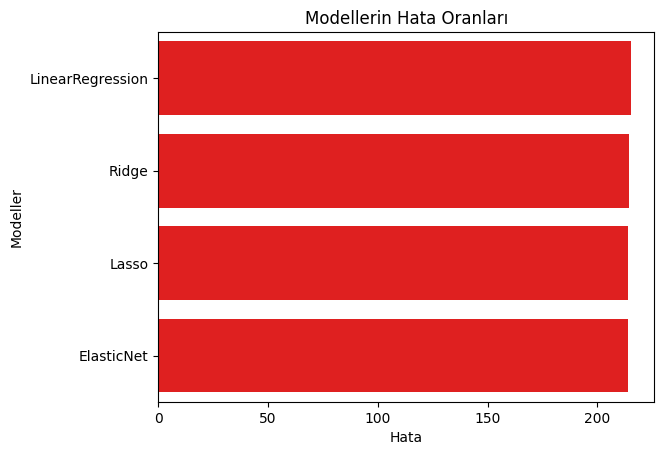

In [47]:
# Elde edilen hatalar görselleştirildi.
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Hata"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))    
    sonuc = pd.DataFrame([[isimler, hata]], columns= ["Modeller","Hata"])
    sonuclar = pd.concat([sonuclar, sonuc])

    
    
sns.barplot(x= 'Hata', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Hata')
plt.title('Modellerin Hata Oranları');

In [131]:
# Elde edilen sonuçlar dataframe olarak kaydedildi.
sonuclar_df = pd.DataFrame({"Train Hatası MSE": [lin_reg_train_MSE, ridge_train_MSE, lasso_train_MSE, elastic_train_MSE],
                            "Test Hatası MSE": [lin_reg_test_MSE, ridge_test_MSE, lasso_test_MSE, elastic_test_MSE],
                            "Tuned Train Hatası MSE": ["Yok", ridge_tuned_train_MSE, lasso_tuned_train_MSE, elastic_tuned_train_MSE],
                            "Tuned Test Hatası MSE": ["Yok", ridge_tuned_test_MSE, lasso_tuned_test_MSE, elastic_tuned_test_MSE],

                            "Train Hatası RMSE": [lin_reg_train_RMSE, ridge_train_RMSE, lasso_train_RMSE, elastic_train_RMSE],
                            "Test Hatası RMSE": [lin_reg_test_RMSE, ridge_test_RMSE, lasso_test_RMSE, elastic_test_RMSE],
                            "Tuned Train Hatası RMSE": ["Yok", ridge_tuned_train_RMSE, lasso_tuned_train_RMSE, elastic_tuned_train_RMSE],
                            "Tuned Test Hatası RMSE": ["Yok", ridge_tuned_test_RMSE, lasso_tuned_test_RMSE, elastic_tuned_test_RMSE],

                            "Train Hatası MAE": [lin_reg_train_MAE, ridge_train_MAE, lasso_train_MAE, elastic_train_MAE],
                            "Test Hatası MAE": [lin_reg_test_MAE, ridge_test_MAE, lasso_test_MAE, elastic_test_MAE],
                            "Tuned Train Hatası MAE": ["Yok", ridge_tuned_train_MAE, lasso_tuned_train_MAE, elastic_tuned_train_MAE],
                            "Tuned Test Hatası MAE": ["Yok", ridge_tuned_test_MAE, lasso_tuned_test_MAE, elastic_tuned_test_MAE],

                            "Train Hatası R2": [lin_reg_train_R2, ridge_train_R2, lasso_train_R2, elastic_train_R2],
                            "Test Hatası R2": [lin_reg_test_R2, ridge_test_R2, lasso_test_R2, elastic_test_R2],
                            "Tuned Train Hatası R2": ["Yok", ridge_tuned_train_R2, lasso_tuned_train_R2, elastic_tuned_train_R2],
                            "Tuned Test Hatası R2": ["Yok", ridge_tuned_test_R2, lasso_tuned_test_R2, elastic_tuned_test_R2],

                            "Cross Val Score RMSE": [lin_reg_cross_val_RMSE, ridge_cross_val_RMSE, lasso_cross_val_RMSE, elastic_cross_val_RMSE],
                            "Tuned Cross Val Score RMSE": ["Yok", ridge_tuned_cross_val_RMSE, lasso_tuned_cross_val_RMSE, elastic_tuned_cross_val_RMSE],

                            "Alpha Değerleri": ["Yok", ridge_alpha, lasso_alpha, elastic_alpha]
                            })
sonuclar_df.index = ["COKLU_LR_DETAY",
                     "RIDGE_DETAY", "LASSO_DETAY", "ELASTICNET_DETAY"]
sonuclar_df.T


,COKLU_LR_DETAY,RIDGE_DETAY,LASSO_DETAY,ELASTICNET_DETAY
Train Hatası MSE,44021.62634,44944.78704,45259.93973,62986.08401
Test Hatası MSE,46277.04520,45914.53926,45687.25533,62917.70443
Tuned Train Hatası MSE,Yok,44944.78704,45259.93973,45259.93973
Tuned Test Hatası MSE,Yok,45914.53926,45687.25533,45687.25533
Train Hatası RMSE,209.81331,212.00186,212.74384,250.97029
Test Hatası RMSE,215.12100,214.27678,213.74577,250.83402
Tuned Train Hatası RMSE,Yok,212.00186,212.74384,212.74384
Tuned Test Hatası RMSE,Yok,214.27678,213.74577,213.74577
Train Hatası MAE,148.53146,150.76085,150.61155,171.48643
Test Hatası MAE,156.75523,156.47215,155.02271,183.69194


# Modelling With NonLinear Regression Models

In [55]:
# KNN
# Support Vector Regression (SVR)
# CART
# Random Forests (RF)
# Gradient Boosting Machines (GBM)
# eXtreme Gradient Boosting (XGBoost)
# LightGBM
# CatBoost
# Neural Networks

In [58]:
knn = KNeighborsRegressor().fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

knn_test_MSE = mean_squared_error(y_pred_test, y_test)
knn_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
knn_test_MAE = mean_absolute_error(y_pred_test, y_test)
knn_test_R2 = r2_score(y_pred_test, y_test)

knn_train_MSE = mean_squared_error(y_pred_train, y_train)
knn_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
knn_train_MAE = mean_absolute_error(y_pred_train, y_train)
knn_train_R2 = r2_score(y_pred_train, y_train)

knn_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [59]:
knn_params = {"n_neighbors": np.arange(2,30,1)}
knn_model = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn_model, knn_params, cv = 10).fit(X_train, y_train)

In [60]:
knn_tuned = KNeighborsRegressor(**knn_cv_model.best_params_).fit(X_train, y_train)

y_pred_test = knn_tuned.predict(X_test)
y_pred_train = knn_tuned.predict(X_train)

knn_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
knn_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
knn_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
knn_tuned_test_R2 = r2_score(y_pred_test, y_test)

knn_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
knn_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
knn_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
knn_tuned_train_R2 = r2_score(y_pred_train, y_train)

knn_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [61]:
svr = SVR().fit(X_train, y_train)

y_pred_test = svr.predict(X_test)
y_pred_train = svr.predict(X_train)

svr_test_MSE = mean_squared_error(y_pred_test, y_test)
svr_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
svr_test_MAE = mean_absolute_error(y_pred_test, y_test)
svr_test_R2 = r2_score(y_pred_test, y_test)

svr_train_MSE = mean_squared_error(y_pred_train, y_train)
svr_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
svr_train_MAE = mean_absolute_error(y_pred_train, y_train)
svr_train_R2 = r2_score(y_pred_train, y_train)

svr_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [65]:
svr_model = SVR()
svr_params = {"C": [0.01, 0.001, 0.2, 0.1,
                    0.5, 0.8, 0.9, 1, 10, 100, 500, 1000]}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [66]:
svr_tuned = SVR(**svr_cv_model.best_params_).fit(X_train, y_train)

y_pred_test = svr_tuned.predict(X_test)
y_pred_train = svr_tuned.predict(X_train)

svr_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
svr_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
svr_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
svr_tuned_test_R2 = r2_score(y_pred_test, y_test)

svr_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
svr_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
svr_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
svr_tuned_train_R2 = r2_score(y_pred_train, y_train)

svr_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [70]:
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)

dec_tree_test_MSE = mean_squared_error(y_pred_test, y_test)
dec_tree_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
dec_tree_test_MAE = mean_absolute_error(y_pred_test, y_test)
dec_tree_test_R2 = r2_score(y_pred_test, y_test)

dec_tree_train_MSE = mean_squared_error(y_pred_train, y_train)
dec_tree_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
dec_tree_train_MAE = mean_absolute_error(y_pred_train, y_train)
dec_tree_train_R2 = r2_score(y_pred_train, y_train)

dec_tree_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [71]:
dec_tree = DecisionTreeRegressor()
dec_tree_params = {"max_depth": [2, 3, 4, 5, 10, 20, 100, 1000],
                   "min_samples_split": [2, 10, 5, 30, 50, 10]}

dec_tree_cv = GridSearchCV(dec_tree, dec_tree_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


In [72]:
dec_tree_tuned = DecisionTreeRegressor(**dec_tree_cv.best_params_).fit(X_train, y_train)

y_pred_test = dec_tree_tuned.predict(X_test)
y_pred_train = dec_tree_tuned.predict(X_train)

dec_tree_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
dec_tree_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
dec_tree_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
dec_tree_tuned_test_R2 = r2_score(y_pred_test, y_test)

dec_tree_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
dec_tree_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
dec_tree_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
dec_tree_tuned_train_R2 = r2_score(y_pred_train, y_train)

dec_tree_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [73]:
rf = RandomForestRegressor().fit(X_train, y_train)

y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

rf_test_MSE = mean_squared_error(y_pred_test, y_test)
rf_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
rf_test_MAE = mean_absolute_error(y_pred_test, y_test)
rf_test_R2 = r2_score(y_pred_test, y_test)

rf_train_MSE = mean_squared_error(y_pred_train, y_train)
rf_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
rf_train_MAE = mean_absolute_error(y_pred_train, y_train)
rf_train_R2 = r2_score(y_pred_train, y_train)

rf_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [74]:
rf = RandomForestRegressor()
rf_params = {"max_depth": [5, 10, None],
             "max_features": [2, 5, 10],
             "n_estimators": [100, 500, 900],
             "min_samples_split": [2, 10, 30]}
rf_cv = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=1).fit(X_train, y_train)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [75]:
rf_tuned = RandomForestRegressor(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_test = rf_tuned.predict(X_test)
y_pred_train = rf_tuned.predict(X_train)

rf_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
rf_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
rf_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
rf_tuned_test_R2 = r2_score(y_pred_test, y_test)

rf_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
rf_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
rf_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
rf_tuned_train_R2 = r2_score(y_pred_train, y_train)

rf_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

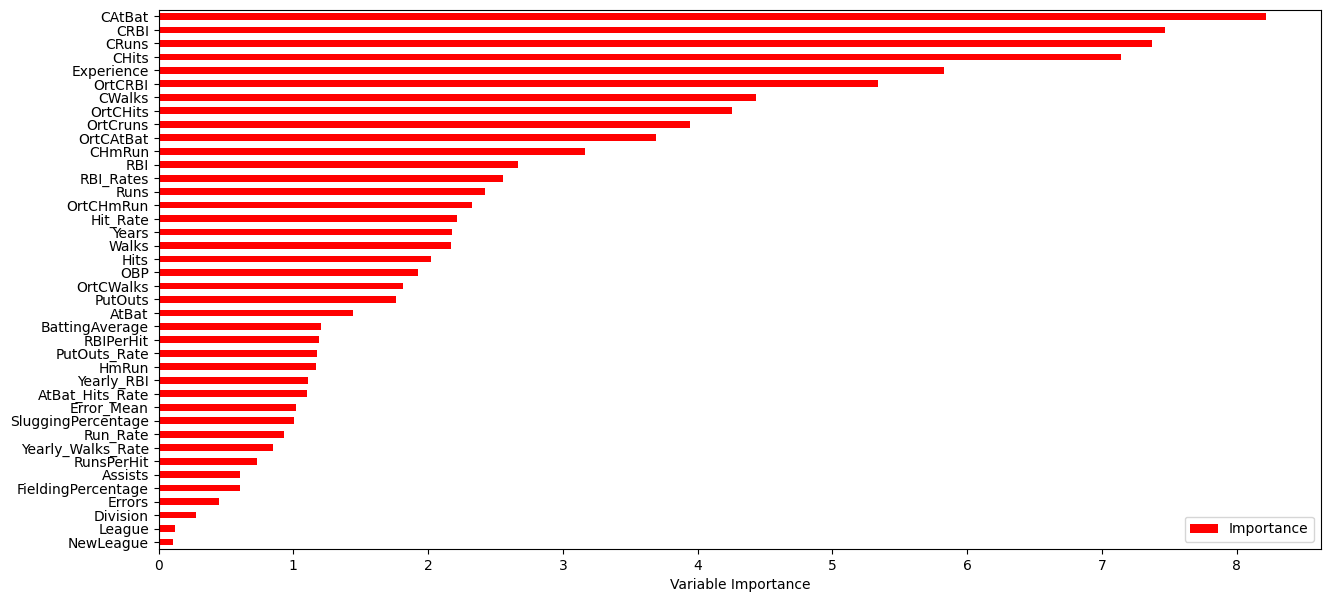

In [98]:
Importance = pd.DataFrame(
    {'Importance': rf_tuned.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance',
                       axis=0,
                       ascending=True).plot(kind='barh',
                                            color='r', figsize=(15, 7))

plt.xlabel('Variable Importance')
plt.show()


In [102]:
gboost = GradientBoostingRegressor().fit(X_train, y_train)

y_pred_test = gboost.predict(X_test)
y_pred_train = gboost.predict(X_train)

gboost_test_MSE = mean_squared_error(y_pred_test, y_test)
gboost_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
gboost_test_MAE = mean_absolute_error(y_pred_test, y_test)
gboost_test_R2 = r2_score(y_pred_test, y_test)

gboost_train_MSE = mean_squared_error(y_pred_train, y_train)
gboost_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
gboost_train_MAE = mean_absolute_error(y_pred_train, y_train)
gboost_train_R2 = r2_score(y_pred_train, y_train)

gboost_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [103]:
gboost = GradientBoostingRegressor()
gboost_params = {"learning_rate": [0.001, 0.1, 0.01],
                 "max_depth": [3, 5, 8, 10],
                 "n_estimators": [200, 500, 1000],
                 "subsample": [1, 0.5, 0.8],
                 "loss": ["ls", "lad", "quantile"]}


gboost_cv = GridSearchCV(gboost,
                         gboost_params,
                         cv=10,
                         n_jobs=-1,
                         verbose=2).fit(X_train, y_train)

# Fitting 10 folds for each of 324 candidates, totalling 3240 fits ====> 6m 27s

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


In [105]:
gboost_tuned = GradientBoostingRegressor(**gboost_cv.best_params_).fit(X_train, y_train)

y_pred_test = gboost_tuned.predict(X_test)
y_pred_train = gboost_tuned.predict(X_train)

gboost_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
gboost_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
gboost_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
gboost_tuned_test_R2 = r2_score(y_pred_test, y_test)

gboost_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
gboost_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
gboost_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
gboost_tuned_train_R2 = r2_score(y_pred_train, y_train)

gboost_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [107]:
xgb = XGBRegressor().fit(X_train, y_train)

y_pred_test = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

xgb_test_MSE = mean_squared_error(y_pred_test, y_test)
xgb_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
xgb_test_MAE = mean_absolute_error(y_pred_test, y_test)
xgb_test_R2 = r2_score(y_pred_test, y_test)

xgb_train_MSE = mean_squared_error(y_pred_train, y_train)
xgb_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
xgb_train_MAE = mean_absolute_error(y_pred_train, y_train)
xgb_train_R2 = r2_score(y_pred_train, y_train)

xgb_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [108]:
xgb = XGBRegressor()
xgb_params = {"learning_rate": [0.1, 0.01, 1],
              "max_depth": [2, 5, 8],
              "n_estimators": [100, 500, 1000],
              "colsample_bytree": [0.3, 0.6, 1]}

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10,
                            n_jobs=-1, verbose=2).fit(X_train, y_train)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [109]:
xgb_tuned = XGBRegressor(**xgb_cv_model.best_params_).fit(X_train, y_train)

y_pred_test = xgb_tuned.predict(X_test)
y_pred_train = xgb_tuned.predict(X_train)

xgb_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
xgb_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
xgb_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
xgb_tuned_test_R2 = r2_score(y_pred_test, y_test)

xgb_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
xgb_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
xgb_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
xgb_tuned_train_R2 = r2_score(y_pred_train, y_train)

xgb_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [110]:
lgbm = LGBMRegressor().fit(X_train, y_train)

y_pred_test = lgbm.predict(X_test)
y_pred_train = lgbm.predict(X_train)

lgbm_test_MSE = mean_squared_error(y_pred_test, y_test)
lgbm_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
lgbm_test_MAE = mean_absolute_error(y_pred_test, y_test)
lgbm_test_R2 = r2_score(y_pred_test, y_test)

lgbm_train_MSE = mean_squared_error(y_pred_train, y_train)
lgbm_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
lgbm_train_MAE = mean_absolute_error(y_pred_train, y_train)
lgbm_train_R2 = r2_score(y_pred_train, y_train)

lgbm_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [112]:
lgbm = LGBMRegressor()
lgbm_params = {"learning_rate": [0.01, 0.1, 1],
               "n_estimators": [200, 1000, 10000],
               "max_depth": [2, 5, 10],
               "colsample_bytree": [1, 0.5, 0.3]}

lgbm_cv_model = GridSearchCV(lgbm,
                             lgbm_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)


Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [113]:
lgbm_tuned = LGBMRegressor(**lgbm_cv_model.best_params_).fit(X_train, y_train)

y_pred_test = lgbm_tuned.predict(X_test)
y_pred_train = lgbm_tuned.predict(X_train)

lgbm_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
lgbm_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
lgbm_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
lgbm_tuned_test_R2 = r2_score(y_pred_test, y_test)

lgbm_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
lgbm_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
lgbm_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
lgbm_tuned_train_R2 = r2_score(y_pred_train, y_train)

lgbm_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [114]:
catb = CatBoostRegressor(verbose = False).fit(X_train, y_train)

y_pred_test = catb.predict(X_test)
y_pred_train = catb.predict(X_train)

catb_test_MSE = mean_squared_error(y_pred_test, y_test)
catb_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
catb_test_MAE = mean_absolute_error(y_pred_test, y_test)
catb_test_R2 = r2_score(y_pred_test, y_test)

catb_train_MSE = mean_squared_error(y_pred_train, y_train)
catb_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
catb_train_MAE = mean_absolute_error(y_pred_train, y_train)
catb_train_R2 = r2_score(y_pred_train, y_train)

catb_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))

In [117]:
catb = CatBoostRegressor(verbose=False)
catb_params = {"iterations": [500, 1000],
               "learning_rate": [0.01, 0.1],
               "depth": [2, 6]}
# catb_params = {"iterations": [500, 1000, 10000],
#                "learning_rate": [0.01, 0.1, 1],
#                "depth": [2, 6, 10]}

catb_cv_model = GridSearchCV(catb,
                             catb_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [118]:
catb_tuned = CatBoostRegressor(**catb_cv_model.best_params_, verbose = False).fit(X_train, y_train)

y_pred_test = catb_tuned.predict(X_test)
y_pred_train = catb_tuned.predict(X_train)

catb_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
catb_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
catb_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
catb_tuned_test_R2 = r2_score(y_pred_test, y_test)

catb_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
catb_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
catb_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
catb_tuned_train_R2 = r2_score(y_pred_train, y_train)

catb_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [119]:
mlp_model = MLPRegressor().fit(X_train, y_train)

y_pred_test = mlp_model.predict(X_test)
y_pred_train = mlp_model.predict(X_train)

mlp_model_test_MSE = mean_squared_error(y_pred_test, y_test)
mlp_model_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
mlp_model_test_MAE = mean_absolute_error(y_pred_test, y_test)
mlp_model_test_R2 = r2_score(y_pred_test, y_test)

mlp_model_train_MSE = mean_squared_error(y_pred_train, y_train)
mlp_model_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
mlp_model_train_MAE = mean_absolute_error(y_pred_train, y_train)
mlp_model_train_R2 = r2_score(y_pred_train, y_train)

mlp_model_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [120]:
mlp_model = MLPRegressor()
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001],
              "hidden_layer_sizes": [(10, 20), (5, 5), (100, 100), (1000, 100, 10)]}
mlp_cv_model = GridSearchCV(
    mlp_model, mlp_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)


Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [121]:
mlp_tuned = MLPRegressor(**mlp_cv_model.best_params_).fit(X_train, y_train)

y_pred_test = mlp_tuned.predict(X_test)
y_pred_train = mlp_tuned.predict(X_train)

mlp_tuned_test_MSE = mean_squared_error(y_pred_test, y_test)
mlp_tuned_test_RMSE = np.sqrt(mean_squared_error(y_pred_test, y_test))
mlp_tuned_test_MAE = mean_absolute_error(y_pred_test, y_test)
mlp_tuned_test_R2 = r2_score(y_pred_test, y_test)

mlp_tuned_train_MSE = mean_squared_error(y_pred_train, y_train)
mlp_tuned_train_RMSE = np.sqrt(mean_squared_error(y_pred_train, y_train))
mlp_tuned_train_MAE = mean_absolute_error(y_pred_train, y_train)
mlp_tuned_train_R2 = r2_score(y_pred_train, y_train)

mlp_tuned_cross_val_RMSE = np.sqrt(
    np.mean(-cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))


In [129]:
 models = [
    knn_tuned,
    svr_tuned,
    dec_tree_tuned,
    rf_tuned,
    lgbm_tuned,
    xgb_tuned,
    lgbm_tuned,
    catb_tuned,
    mlp_tuned]


for model in models:
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(model_name)
    print("rmse:" + str(rmse))

----------------------------
KNeighborsRegressor
rmse:272.5456538156008
----------------------------
SVR
rmse:239.78973649467417
----------------------------
DecisionTreeRegressor
rmse:244.04773429410054
----------------------------
RandomForestRegressor
rmse:223.08662450532222
----------------------------
LGBMRegressor
rmse:211.71718671767496
----------------------------
XGBRegressor
rmse:220.56706261508631
----------------------------
LGBMRegressor
rmse:211.71718671767496
----------------------------
CatBoostRegressor
rmse:227.917446668234
----------------------------
MLPRegressor
rmse:204.48694269014453


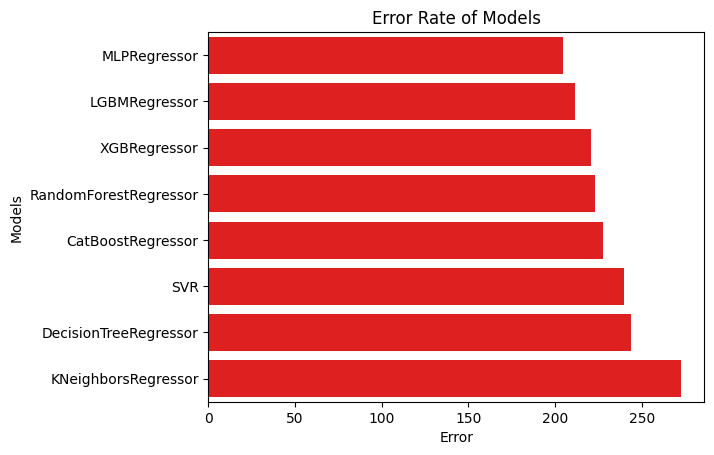

In [127]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Models","Error"])

for model in models:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    hata = np.sqrt(mean_squared_error(y_test, y_pred))    
    sonuc = pd.DataFrame([[isimler, hata]], columns= ["Models","Error"])
    sonuclar = pd.concat([sonuclar, sonuc])
    
    
sns.barplot(x= 'Error', y = 'Models', data=sonuclar.sort_values(by = "Error"), color="r")
plt.xlabel('Error')
plt.title('Error Rate of Models');  

In [140]:
# Elde edilen sonuçlar dataframe olarak kaydedildi.
sonuclar_df = pd.DataFrame({"Train Hatası MSE": [knn_train_MSE, svr_train_MSE, dec_tree_train_MSE, rf_train_MSE, lgbm_train_MSE, xgb_train_MSE, catb_train_MSE, mlp_model_train_MSE],
                            "Test Hatası MSE": [knn_test_MSE, svr_test_MSE, dec_tree_test_MSE, rf_test_MSE, lgbm_test_MSE, xgb_test_MSE, catb_test_MSE, mlp_model_test_MSE],
                            "Tuned Train Hatası MSE": [knn_tuned_train_MSE, svr_tuned_train_MSE, dec_tree_tuned_train_MSE, rf_tuned_train_MSE, lgbm_tuned_train_MSE, xgb_tuned_train_MSE, catb_tuned_train_MSE, mlp_tuned_train_MSE],
                            "Tuned Test Hatası MSE": [knn_tuned_test_MSE, svr_tuned_test_MSE, dec_tree_tuned_test_MSE, rf_tuned_test_MSE, lgbm_tuned_test_MSE, xgb_tuned_test_MSE, catb_tuned_test_MSE, mlp_tuned_test_MSE],

                            "Train Hatası RMSE": [knn_train_RMSE, svr_train_RMSE, dec_tree_train_RMSE, rf_train_RMSE, lgbm_train_RMSE, xgb_train_RMSE, catb_train_RMSE, mlp_model_train_RMSE],
                            "Test Hatası RMSE": [knn_test_RMSE, svr_test_RMSE, dec_tree_test_RMSE, rf_test_RMSE, lgbm_test_RMSE, xgb_test_RMSE, catb_test_RMSE, mlp_model_test_RMSE],
                            "Tuned Train Hatası RMSE": [knn_tuned_train_RMSE, svr_tuned_train_RMSE, dec_tree_tuned_train_RMSE, rf_tuned_train_RMSE, lgbm_tuned_train_RMSE, xgb_tuned_train_RMSE, catb_tuned_train_RMSE, mlp_tuned_train_RMSE],
                            "Tuned Test Hatası RMSE": [knn_tuned_test_RMSE, svr_tuned_test_RMSE, dec_tree_tuned_test_RMSE, rf_tuned_test_RMSE, lgbm_tuned_test_RMSE, xgb_tuned_test_RMSE, catb_tuned_test_RMSE, mlp_tuned_test_RMSE],

                            "Train Hatası MAE": [knn_train_MAE, svr_train_MAE, dec_tree_train_MAE, rf_train_MAE, lgbm_train_MAE, xgb_train_MAE, catb_train_MAE, mlp_model_train_MAE],
                            "Test Hatası MAE": [knn_test_MAE, svr_test_MAE, dec_tree_test_MAE, rf_test_MAE, lgbm_test_MAE, xgb_test_MAE, catb_test_MAE, mlp_model_test_MAE],
                            "Tuned Train Hatası MAE": [knn_tuned_train_MAE, svr_tuned_train_MAE, dec_tree_tuned_train_MAE, rf_tuned_train_MAE, lgbm_tuned_train_MAE, xgb_tuned_train_MAE, catb_tuned_train_MAE, mlp_tuned_train_MAE],
                            "Tuned Test Hatası MAE": [knn_tuned_test_MAE, svr_tuned_test_MAE, dec_tree_tuned_test_MAE, rf_tuned_test_MAE, lgbm_tuned_test_MAE, xgb_tuned_test_MAE, catb_tuned_test_MAE, mlp_tuned_test_MAE],

                            "Train Hatası R2": [knn_train_R2, svr_train_R2, dec_tree_train_R2, rf_train_R2, lgbm_train_R2, xgb_train_R2, catb_train_R2, mlp_model_train_R2],
                            "Test Hatası R2": [knn_test_R2, svr_test_R2, dec_tree_test_R2, rf_test_R2, lgbm_test_R2, xgb_test_R2, catb_test_R2, mlp_model_test_R2],
                            "Tuned Train Hatası R2": [knn_tuned_train_R2, svr_tuned_train_R2, dec_tree_tuned_train_R2, rf_tuned_train_R2, lgbm_tuned_train_R2, xgb_tuned_train_R2, catb_tuned_train_R2, mlp_tuned_train_R2],
                            "Tuned Test Hatası R2": [knn_tuned_test_R2, svr_tuned_test_R2, dec_tree_tuned_test_R2, rf_tuned_test_R2, lgbm_tuned_test_R2, xgb_tuned_test_R2, catb_tuned_test_R2, mlp_tuned_test_R2],

                            "Cross Val Score RMSE": [knn_cross_val_RMSE, svr_cross_val_RMSE, dec_tree_cross_val_RMSE, rf_cross_val_RMSE, lgbm_cross_val_RMSE, xgb_cross_val_RMSE, catb_cross_val_RMSE, mlp_model_cross_val_RMSE],
                            "Tuned Cross Val Score RMSE": [knn_tuned_cross_val_RMSE, svr_tuned_cross_val_RMSE, dec_tree_tuned_cross_val_RMSE, rf_tuned_cross_val_RMSE, lgbm_tuned_cross_val_RMSE, xgb_tuned_cross_val_RMSE, catb_tuned_cross_val_RMSE, mlp_tuned_cross_val_RMSE],
                            })
sonuclar_df.index = ["KNN", "SVR", "DECISIONTREE",
                     "RANDOMFOREST", "LGBM", "XGBOOST", "CATBOOST", "NEURALNETWORK"]
sonuclar_df.T


,KNN,SVR,DECISIONTREE,RANDOMFOREST,LGBM,XGBOOST,CATBOOST,NEURALNETWORK
Train Hatası MSE,48843.99407,173694.01208,0.00000,8895.88167,7351.92782,0.00002,38.21448,210567.20215
Test Hatası MSE,77832.60997,175375.42419,107854.74136,54793.48217,48426.34968,57438.99552,47078.39794,222836.45835
Tuned Train Hatası MSE,67760.44172,40015.65960,51725.68836,9028.23253,24547.98417,1681.66870,19393.31524,38528.61430
Tuned Test Hatası MSE,74281.13341,57499.11773,59559.29661,49767.64203,44824.16715,48649.82911,51946.36250,41814.90973
Train Hatası RMSE,221.00677,416.76614,0.00000,94.31798,85.74338,0.00390,6.18179,458.87602
Test Hatası RMSE,278.98496,418.77849,328.41246,234.08008,220.05988,239.66434,216.97557,472.05557
Tuned Train Hatası RMSE,260.30836,200.03915,227.43282,95.01701,156.67796,41.00815,139.25988,196.28707
Tuned Test Hatası RMSE,272.54565,239.78974,244.04773,223.08662,211.71719,220.56706,227.91745,204.48694
Train Hatası MAE,145.60574,304.48798,0.00000,56.50134,48.64992,0.00255,4.90741,349.34887
Test Hatası MAE,183.28414,311.31369,206.04424,152.84666,150.10252,154.63091,149.46605,369.68102
